# Loki Annotate - Marker Genes
This notebook demonstrates how to run *Loki Annotate* on the demo mark genes validation dataset. It takes about 10 seconds to run this notebook on MacBook Pro.

In [1]:
import pandas as pd
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt

import loki.annotate
import loki.preprocess
import loki.utils
import loki.plot
%matplotlib inline

/opt/anaconda3/envs/basic/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/basic/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


We provide the embeddings generated from the OmiCLIP model.
The sample data and embeddings are stored in the directory `data/loki_annotate/marker_gene_data`, which can be donwloaded from [Google Drive link](https://drive.google.com/file/d/1aPK1nItsOEPxTihUAKMig-vLY-DMMIce/view?usp=sharing).

Here is a list of the files that are needed to run the tissue annotation on the demo validation dataset:
```
.
├── checkpoint_val
│   ├── val_image_embeddings.pt
│   └── val_text_embeddings.pt
└── demo_validation_data
    ├── ADI-TCGA-AAWDNKDK.tif
    ├── ADI-TCGA-CHWDWGEK.tif
    ├── ADI-TCGA-RGCKQTPN.tif
    ├── ADI-TCGA-RRHWRPTE.tif
    ├── ADI-TCGA-YDAHSPAR.tif
    ├── LYM-TCGA-AKGHMWKD.tif
    ├── LYM-TCGA-AMVASFYP.tif
    ├── LYM-TCGA-AYMAHWFQ.tif
    ├── LYM-TCGA-VWAYKKDM.tif
    ├── LYM-TCGA-WSHPCMIR.tif
    ├── MUS-TCGA-AASRLCCT.tif
    ├── MUS-TCGA-CDFYVLPN.tif
    ├── MUS-TCGA-CIFAPIID.tif
    ├── MUS-TCGA-ELFVYKYW.tif
    ├── MUS-TCGA-QSQCNCSP.tif
    ├── NORM-TCGA-ACCEDPAW.tif
    ├── NORM-TCGA-AFFFQQST.tif
    ├── NORM-TCGA-APSNTVTS.tif
    ├── NORM-TCGA-EPIQVVLF.tif
    ├── NORM-TCGA-FTGGIFEL.tif
    ├── TUM-TCGA-CVGTRDRC.tif
    ├── TUM-TCGA-DPRWETWM.tif
    ├── TUM-TCGA-TKLWWMII.tif
    ├── TUM-TCGA-TLSHWGSQ.tif
    ├── TUM-TCGA-YTPCKKYY.tif
    └── image_names.txt                                          
```

In [2]:
data_path = '../data/loki_annotate/marker_gene_data/' 

In [3]:
filenames = pd.read_csv(os.path.join(data_path, 'demo_validation_data', 'image_names.txt'), header=None)[0].tolist()

In [4]:
classes = ['Tumor', 
           'Adipose',
           'Muscle',
           'Lymphocytes',
           'Normal colon mucosa',]

## Loki Annote with marker genes
Use Loki Annotate to annotate tumor, adipose, muscle, lymphocytes, and normal colon mucosa tissue patch images using corresponding marker genes.

In [5]:
# text = ['TP53 EPCAM KRAS EGFR DEFA5 DEFA6 CEACAM5 CEA KRT18 KRT8 KRT19 CDH17 CK20 MYO6 TP53BP2 PLA2G2A CLDN7 TJP1 PKP3 DSP',
#         'FABP4 ADIPOQ LEP ACSL1 APOE GPAM FABP1 CEBPA LIPE ADIPOR1 ADIPOR2',
#         'MYL6 MYL9 TPM2 TPM1 DES MYH11 COL3A1 CALD1 MYLK SMTN NPPA TNNT2 LMOD1 ACTA2 CNN1 MYOCD ACTA1 MYLK2',
#         'TRBC2 IL2 IL2RA IL2RB IL4 TNF LAPTM5 TERF2IP ATF6 CD79A CD3D CD24 CD3E CD4 CD8A CD25 CD34 CD45 CD56 CD69',
#         'CDX2 SI LCT VIL1 FABP2 KRT20 SLC5A1 SLC26A3 SLC9A3 GSTA1 TFF3 CDH17 GUCY2C GUCA2A GUCA2B AQP8 GCG']
all_text_embeddings = torch.load(os.path.join(data_path, 'checkpoint_val', 'val_text_embeddings.pt'))
all_image_embeddings = torch.load(os.path.join(data_path, 'checkpoint_val', 'val_image_embeddings.pt'))

Predicted class: Adipose
Similarity scores: ['Tumor: 0.341', 'Adipose: 0.391', 'Muscle: 0.328', 'Lymphocytes: 0.303', 'Normal colon mucosa: 0.349']


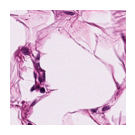

Predicted class: Adipose
Similarity scores: ['Tumor: 0.315', 'Adipose: 0.390', 'Muscle: 0.358', 'Lymphocytes: 0.309', 'Normal colon mucosa: 0.342']


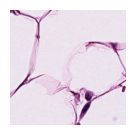

Predicted class: Adipose
Similarity scores: ['Tumor: 0.341', 'Adipose: 0.372', 'Muscle: 0.336', 'Lymphocytes: 0.313', 'Normal colon mucosa: 0.321']


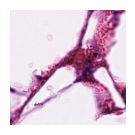

Predicted class: Adipose
Similarity scores: ['Tumor: 0.326', 'Adipose: 0.393', 'Muscle: 0.352', 'Lymphocytes: 0.310', 'Normal colon mucosa: 0.355']


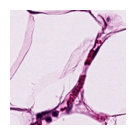

Predicted class: Adipose
Similarity scores: ['Tumor: 0.319', 'Adipose: 0.420', 'Muscle: 0.327', 'Lymphocytes: 0.322', 'Normal colon mucosa: 0.319']


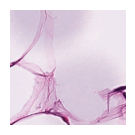

Predicted class: Muscle
Similarity scores: ['Tumor: 0.342', 'Adipose: 0.320', 'Muscle: 0.365', 'Lymphocytes: 0.319', 'Normal colon mucosa: 0.312']


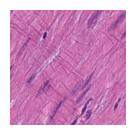

Predicted class: Muscle
Similarity scores: ['Tumor: 0.356', 'Adipose: 0.322', 'Muscle: 0.363', 'Lymphocytes: 0.316', 'Normal colon mucosa: 0.320']


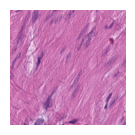

Predicted class: Muscle
Similarity scores: ['Tumor: 0.352', 'Adipose: 0.323', 'Muscle: 0.361', 'Lymphocytes: 0.314', 'Normal colon mucosa: 0.308']


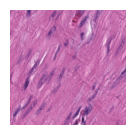

Predicted class: Muscle
Similarity scores: ['Tumor: 0.353', 'Adipose: 0.333', 'Muscle: 0.368', 'Lymphocytes: 0.332', 'Normal colon mucosa: 0.291']


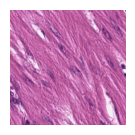

Predicted class: Muscle
Similarity scores: ['Tumor: 0.353', 'Adipose: 0.334', 'Muscle: 0.371', 'Lymphocytes: 0.302', 'Normal colon mucosa: 0.338']


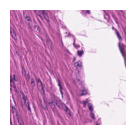

Predicted class: Normal colon mucosa
Similarity scores: ['Tumor: 0.378', 'Adipose: 0.372', 'Muscle: 0.351', 'Lymphocytes: 0.314', 'Normal colon mucosa: 0.386']


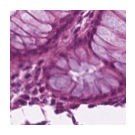

Predicted class: Normal colon mucosa
Similarity scores: ['Tumor: 0.346', 'Adipose: 0.354', 'Muscle: 0.336', 'Lymphocytes: 0.333', 'Normal colon mucosa: 0.360']


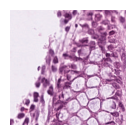

Predicted class: Normal colon mucosa
Similarity scores: ['Tumor: 0.351', 'Adipose: 0.333', 'Muscle: 0.297', 'Lymphocytes: 0.323', 'Normal colon mucosa: 0.355']


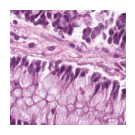

Predicted class: Normal colon mucosa
Similarity scores: ['Tumor: 0.343', 'Adipose: 0.339', 'Muscle: 0.320', 'Lymphocytes: 0.328', 'Normal colon mucosa: 0.360']


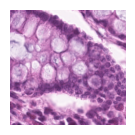

Predicted class: Normal colon mucosa
Similarity scores: ['Tumor: 0.350', 'Adipose: 0.329', 'Muscle: 0.301', 'Lymphocytes: 0.340', 'Normal colon mucosa: 0.359']


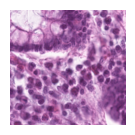

Predicted class: Tumor
Similarity scores: ['Tumor: 0.403', 'Adipose: 0.345', 'Muscle: 0.326', 'Lymphocytes: 0.318', 'Normal colon mucosa: 0.382']


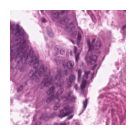

Predicted class: Tumor
Similarity scores: ['Tumor: 0.393', 'Adipose: 0.343', 'Muscle: 0.336', 'Lymphocytes: 0.323', 'Normal colon mucosa: 0.372']


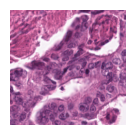

Predicted class: Tumor
Similarity scores: ['Tumor: 0.399', 'Adipose: 0.343', 'Muscle: 0.326', 'Lymphocytes: 0.319', 'Normal colon mucosa: 0.380']


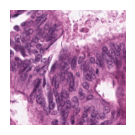

Predicted class: Tumor
Similarity scores: ['Tumor: 0.391', 'Adipose: 0.321', 'Muscle: 0.310', 'Lymphocytes: 0.312', 'Normal colon mucosa: 0.369']


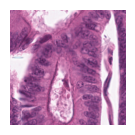

Predicted class: Tumor
Similarity scores: ['Tumor: 0.398', 'Adipose: 0.333', 'Muscle: 0.311', 'Lymphocytes: 0.311', 'Normal colon mucosa: 0.374']


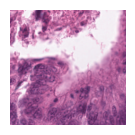

Predicted class: Lymphocytes
Similarity scores: ['Tumor: 0.342', 'Adipose: 0.325', 'Muscle: 0.297', 'Lymphocytes: 0.355', 'Normal colon mucosa: 0.348']


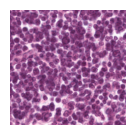

Predicted class: Lymphocytes
Similarity scores: ['Tumor: 0.341', 'Adipose: 0.313', 'Muscle: 0.301', 'Lymphocytes: 0.345', 'Normal colon mucosa: 0.345']


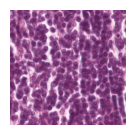

Predicted class: Lymphocytes
Similarity scores: ['Tumor: 0.344', 'Adipose: 0.313', 'Muscle: 0.301', 'Lymphocytes: 0.346', 'Normal colon mucosa: 0.343']


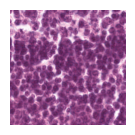

Predicted class: Lymphocytes
Similarity scores: ['Tumor: 0.356', 'Adipose: 0.328', 'Muscle: 0.303', 'Lymphocytes: 0.357', 'Normal colon mucosa: 0.355']


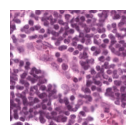

Predicted class: Lymphocytes
Similarity scores: ['Tumor: 0.337', 'Adipose: 0.318', 'Muscle: 0.298', 'Lymphocytes: 0.346', 'Normal colon mucosa: 0.343']


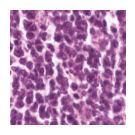

In [6]:
i=0
for image_name in filenames:
    image_path =os.path.join(data_path, 'demo_validation_data', image_name)
    image = Image.open(image_path)    

    image_embeddings = all_image_embeddings[i]
    dot_similarity, pred_class = loki.annotate.annotate_with_marker_genes(classes, image_embeddings, all_text_embeddings)  

    plt.figure(figsize=(1.5,1.5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(print("Predicted class:", pred_class))
    plt.title(print("Similarity scores:", [f"{cls}: {score:.3f}" for cls, score in zip(classes, dot_similarity)]))
    plt.show()

    i=i+1